### 목표 : 생선 품종 분류 모델
    - 데이터 : 2가지 품종의 생선 데이터 fish.csv
    - Feature : Weight, Length
    - Target : Species
    - 유   형 : 지도 학습 / 분류
<hr>

(1) 모듈 준비

In [97]:
import pandas as pd # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier # 기계학습 관련 모듈

In [98]:
data_file='fish.csv'


# 5개의 피처/특성 중 2개의 피처 특성 선택

fishDF = pd.read_csv(data_file, usecols=[0,1,2])

fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [99]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt']) # Boolean indexing

# 해당 행만 도출
twoFishDF=fishDF[mask] # species가 bream, smelt인 것만 필터링 하여 도출.

In [100]:
# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)


In [117]:
# Bream, Smelt 품종명 수치화
#twoFishDF['Species']=twoFishDF['Species'].replace({'Bream':0, 'Smelt':1}).copy()
twoFishDF.loc[:, 'Species']=twoFishDF['Species'].replace({'Bream':0, 'Smelt':1}).copy()

# 형태가 object이므로 int로 변경.
twoFishDF['Species'] = twoFishDF['Species'].astype('int')
twoFishDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 7 to 41
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     int32  
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 1.3 KB


(2) 데이터 전처리

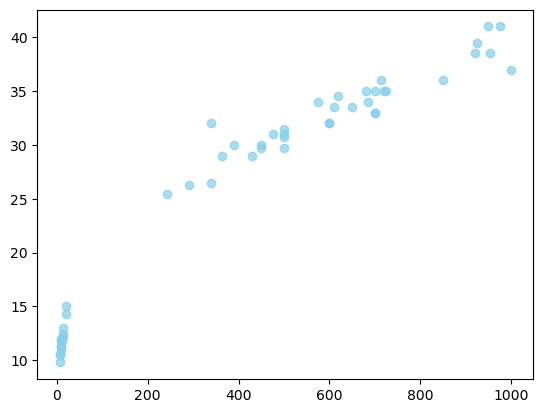

In [118]:
# Weight, Length로 품종 구별 가능한지 시각화 확인.


import matplotlib.pyplot as plt

plt.scatter(twoFishDF.Weight, twoFishDF['Length'], c = 'skyblue', alpha=0.7)

(3) 기계학습을 위한 데이터 준비
- 피처/특성 + 타겟/라벨/클래스
- 학습용 데이터셋 : 80%
- 테스트용 데이터셋 : 20%

(3-1) 직접 타겟/라벨 컬럼의 비율을 고려하여 학습&테스트용 데이터셋 준비

In [119]:
# 데이터 섞기 => 100% 모두 섞기
twoFishDF = twoFishDF.sample(frac=1.0)
print(twoFishDF.shape)
twoFishDF # 섞인 것 확인 가능

# frac은 DataFrame에서 샘플을 추출할 때 선택하는 비율을 나타내는 매개변수. 
# 값은 0과 1 사이의 실수, 0은 샘플을 선택하지 않음을 의미, 1은 전체 DataFrame을 선택함을 의미.

(49, 3)


,Species,Weight,Length
28,0,850.0,36.0
17,0,700.0,33.0
35,1,6.7,9.8
41,1,10.0,11.8
31,0,955.0,38.5
10,0,475.0,31.0
46,1,12.2,13.0
20,0,575.0,34.0
8,0,450.0,30.0
29,0,1000.0,37.0


In [120]:
# 학습과 테스트 비율 조절 갯수 계산

num = round(twoFishDF.shape[0]*0.8)


# 학습 데이터셋 추출
trainDF = twoFishDF.iloc[:num+1] # 0번부터 num번까지.

# 테스트 데이터셋으로 추출
testDF = twoFishDF.iloc[num+1:] # num+1부터 끝까지.

# 테스트 데이터셋 출력
print(f'\ntest => {testDF.shape}\n{testDF.tail(3)}')


test => (9, 3)
    Species  Weight  Length
11        0   500.0    31.0
2         0   340.0    26.5
14        0   600.0    32.0


(3-2) scikit learn 모듈 활용한 학습&테스트용 데이터셋 준비
- 추가 모듈 로딩

In [121]:
from sklearn.model_selection import train_test_split

In [126]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle=True, train test : 0.75:0.25
## -- [반환] 학습용 피처, 테스트용 피처, 학습용 타겟, 테스트용 타겟

x_train, x_test, y_train, y_test = train_test_split(featuresDF, targetSR)

print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print()
print(x_train.head(2), y_train.head(2), sep='\n')
print()
print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')
print()
print(x_test.head(2), y_test.head(2), sep='\n')
print()

# 타겟 / 클래스 
print(f'{y_train.value_counts()/y_test.shape[0]}')
print(f'{y_test.value_counts()/y_train.shape[0]}')

x_train : (36, 2), y_train : (36,)

    Weight  Length
39     9.8    11.2
27   714.0    36.0
39    1
27    0
Name: Species, dtype: int64

x_test : (13, 2), y_test : (13,)

    Weight  Length
34   950.0    41.0
44    12.2    12.2
34    0
44    1
Name: Species, dtype: int64

Species
0    2.076923
1    0.692308
Name: count, dtype: float64
Species
0    0.222222
1    0.138889
Name: count, dtype: float64


In [108]:
## -- 비율 설정 학습/테스트셋 분리
## -- [기본] shuffle=True
## -- [전달] 피처데이터/타겟데이터
## -- [설정] train test : 0.9:0:1 => test_size, train_size 매개변수 값
## -- [반환] 학습용 피처, 테스트용 피처, 학습용 타겟, 테스트용 타겟

x_train, x_test, y_train, y_test = train_test_split(featuresDF, targetSR, test_size=0.1)


print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print()
print(x_train.head(2), y_train.head(2), sep='\n')
print()
print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')
print()
print(x_test.head(2), y_test.head(2), sep='\n')

x_train : (44, 2), y_train : (44,)

    Weight  Length
19   650.0    33.5
9    500.0    30.7
19    0
9     0
Name: Species, dtype: int64

x_test : (5, 2), y_test : (5,)

   Weight  Length
7   390.0    30.0
6   500.0    29.7
7    0
6    0
Name: Species, dtype: int64


In [109]:
## -- 비율 설정 하는 학습/테스트셋 분리
## -- [기본] shuffle=True
## -- [전달] 피처데이터/타겟데이터
## -- [설정] train test : 0.9:0:1 => test_size, train_size 매개변수 값 설정
## --       분류할 때 타겟이 불균형일 경우, 비율 지정하는 stratify 매개변수 설정. 
## -- [반환] 학습용 피처, 테스트용 피처, 학습용 타겟, 테스트용 타겟
x_train, x_test, y_train, y_test = train_test_split(featuresDF, targetSR, test_size=0.1, stratify=targetSR) # 타겟이 불균형하기 때문에 stratify의 매개변수를 타겟으로 지정.

In [127]:
# 검증용 데이터셋 준비 => 학습용 데이터셋에서 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train)
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print()
print(x_train.head(2), y_train.head(2), sep='\n')
print()
print(f'x_val : {x_val.shape}, y_val : {y_val.shape}')
print()
print(x_val.head(2), y_val.head(2), sep='\n')
print()
print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')
print()
print(x_test.head(2), y_test.head(2), sep='\n')


x_train : (32, 2), y_train : (32,)

   Weight  Length
2   340.0    26.5
1   290.0    26.3
2    0
1    0
Name: Species, dtype: int64

x_val : (4, 2), y_val : (4,)

    Weight  Length
40     8.7    11.3
13   340.0    32.0
40    1
13    0
Name: Species, dtype: int64

x_test : (13, 2), y_test : (13,)

    Weight  Length
34   950.0    41.0
44    12.2    12.2
34    0
44    1
Name: Species, dtype: int64


(4) 학습 진행
- 학습 방법 : 지도학습 / 분류 => KNN
- 모델 인스턴스 생성 -> fit() 메서드

In [111]:
# 모델 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [112]:
# 학습 진행 => 학습용 데이터로 진행. 
model.fit(x_train, y_train)

KNeighborsClassifier()

(5) 테스트 진행 => 학습에 사용되지 않은 데이터로 진행

In [113]:
model.score(x_val, y_val)

1.0

(6) 모델 활용 예측 => 새로운 데이터로 진행.

In [114]:
model.predict(x_test) # 예측값

array([0, 0, 0, 1, 0], dtype=int64)

In [115]:
y_test

21    0
28    0
19    0
36    1
11    0
Name: Species, dtype: int64

(6-1) 사용자로부터 전달받은 새로운 데이터에 대한 예측

===> 학습할 때 전달되는 피처형태와 동일한 데이터.

In [130]:
# 길이 25, 무게 160인 생선의 품종을 예측해 보기.
new_data=pd.DataFrame([[160, 25]], columns = twoFishDF.columns[1:])

new_data

,Weight,Length
0,160,25


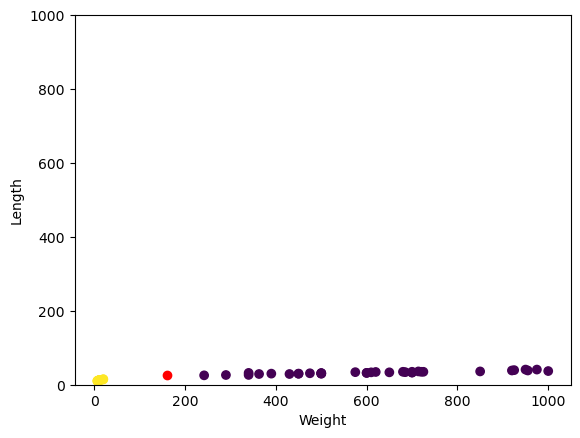

In [156]:
# 새로운 데이터와 학습 데이터의 시각화.
plt.plot(new_data['Weight'], new_data['Length'], 'ro')

# 학습 데이터의 시각화
plt.scatter(twoFishDF['Weight'], twoFishDF['Length'], c=twoFishDF['Species'])
plt.xlabel('Weight')
plt.ylabel('Length')
plt.ylim(0, 1000)
plt.show()

In [145]:
model.predict(new_data)

array([1], dtype=int64)

In [155]:
# 새로운 데이터의 최근접 데이터 추출
_, index = model.kneighbors(new_data) #둘 중 어느 하나만 알고 싶을 때는 필요없는 정보를 _로 치환.

index.tolist()[0] #index는 2차원 데이터이기때문에 [0]으로 추출.
#index는 2차원 데이터이기때문에 [0]으로 추출.


[3, 22, 10, 2, 13]

In [153]:
twoFishDF.iloc[index.tolist()[0]]

,Species,Weight,Length
41,1,10.0,11.8
26,0,720.0,35.0
15,0,600.0,32.0
35,1,6.7,9.8
27,0,714.0,36.0
